In [2]:
import tensorflow as tf

model=tf.keras.models.load_model('c:/data/myMnist.h5')

model.summary()
# x데이터가 784개 -> 28*28*32 : 32는 따로 지정하지 않는 경우 tensorflow의 default값
# dense 번호는 이름을 지정하지 않으면 매번 바뀜
# w->784개, b->1개 : 총 785개인 경우의 수 128개

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [3]:
model.get_weights()
# 784개의 weight가 array 첫번째에 존재
# 이러한 경우의 수가 128개 존재
# bias 128개
# dense_5 : 128개 짜리가 10개의 경우의 수로 존재함

[array([[ 0.03218906, -0.03894668,  0.01193725, ...,  0.00119659,
          0.03059474,  0.05929313],
        [-0.02254718, -0.04602421,  0.04445868, ..., -0.03685915,
          0.06607122,  0.067899  ],
        [ 0.06806638, -0.02277481,  0.07354075, ..., -0.07012255,
         -0.02202213,  0.06287374],
        ...,
        [-0.02565115,  0.02364059,  0.02220613, ...,  0.0550511 ,
         -0.03841482, -0.03166556],
        [ 0.05942161, -0.01006806,  0.03879634, ...,  0.06059248,
         -0.07780537,  0.03400557],
        [-0.07811269, -0.0078112 , -0.00394388, ..., -0.07115638,
         -0.04854267, -0.0654479 ]], dtype=float32),
 array([-0.5044576 , -0.02227265, -0.19627602, -0.28476387, -0.12120763,
        -0.16001238, -0.26867783, -0.29492462, -0.17599386, -0.3005573 ,
        -0.28166646, -0.48605686, -0.5306247 ,  0.01883716,  0.01120785,
        -0.34450257, -0.03989274, -0.0326748 ,  0.1279813 , -0.2455846 ,
        -0.41337487, -0.02482855, -0.13990179,  0.37581024,  0.036

5

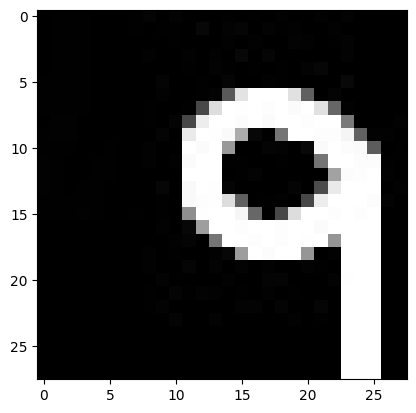

In [22]:
## 784개에 맞는 데이터 불러오기
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img=Image.open('c:/data/mnist_img/mnist_9.jpg').resize((28,28)).convert('L')  # CONVERT : 흑백으로 불러오기
# img=np.array(img)
img=255-np.array(img)
img=img/255
np.shape(img)
# convert를 사용하여 shape를 (28,28,3)에서 (28,28)로 변경

plt.imshow(img, cmap='gray')
# plt.imshow(255-img, cmap='gray') # 흰 배경을 검은 배경으로 바꾸기 위해 255에서 빼줌

predict_Num=model.predict(img.reshape(-1,28,28))  
# 모델 제작할 때 가장 아래쪽의 레이어에 있던 10이라는 숫자에 의해 10개의 경우의 수 (확률 값) 생성
# 가장 큰 확률값을 갖고 있는 위치의 답
np.argmax(predict_Num)
# img로 넣게 되는 경우 array 구조이므로 에러 발생
# img.reshape(-1,28,28)와 같이 tensor 형태로 넣어야 함
# softmax를 사용했으므로 가장 큰 값이 있는 위치를 보여줌

['c:/data/mnist_img\\mnist_2.jpg', 'c:/data/mnist_img\\mnist_3.jpg', 'c:/data/mnist_img\\mnist_5.jpg', 'c:/data/mnist_img\\mnist_6.jpg', 'c:/data/mnist_img\\mnist_7.jpg', 'c:/data/mnist_img\\mnist_8.jpg', 'c:/data/mnist_img\\mnist_9.jpg']
------> predict ----->  6


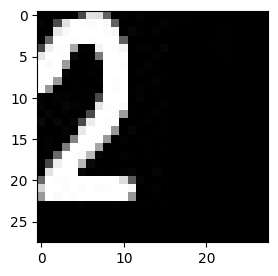

------> predict ----->  3


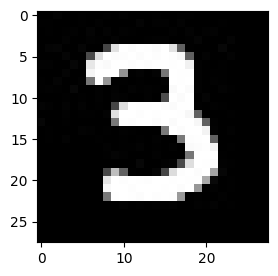

------> predict ----->  5


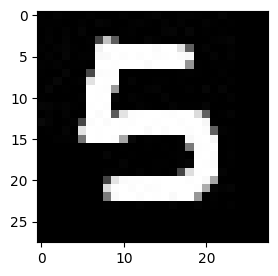

------> predict ----->  6


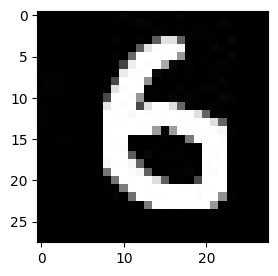

------> predict ----->  9


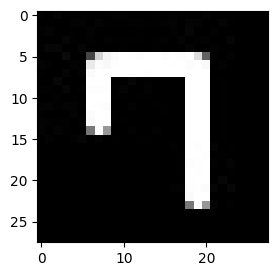

------> predict ----->  8


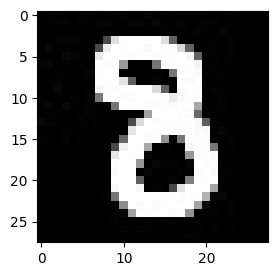

------> predict ----->  5


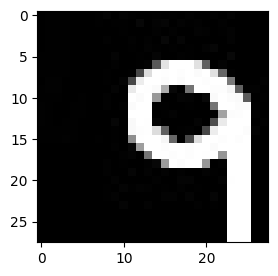

In [23]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

fileList=glob('c:/data/mnist_img/*.jpg')
print(fileList)

for x in fileList:        
    img=Image.open(x).resize((28,28)).convert('L') 
    img=255-np.array(img)
    img=img/255
    np.shape(img)
    
    predict_Num=model.predict(img.reshape(-1,28,28))  
    print('------> predict -----> ',np.argmax(predict_Num))
    
    plt.figure(figsize=(3,3))
    plt.imshow(img, cmap='gray')
    plt.show()

['c:/data/mnist_img\\mnist_2.jpg', 'c:/data/mnist_img\\mnist_3.jpg', 'c:/data/mnist_img\\mnist_5.jpg', 'c:/data/mnist_img\\mnist_6.jpg', 'c:/data/mnist_img\\mnist_7.jpg', 'c:/data/mnist_img\\mnist_8.jpg', 'c:/data/mnist_img\\mnist_9.jpg']


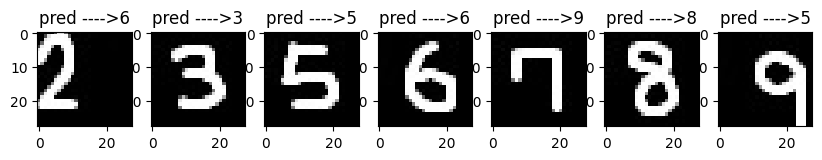

In [34]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

fileList=glob('c:/data/mnist_img/*.jpg')
print(fileList)

plt.figure(figsize=(10,3))

for cnt,x in enumerate(fileList):        
    img=Image.open(x).resize((28,28)).convert('L') 
    img=255-np.array(img)
    img=img/255
    np.shape(img)
    
    predict_Num=model.predict(img.reshape(-1,28,28))  

    plt.subplot(1, len(fileList), cnt+1)
    plt.imshow(img, cmap='gray')
    plt.title('pred ---->'+str(np.argmax(predict_Num)))

In [11]:
img.max(), img.min()
# min max 값을 통해 스케일링 된 자료인지 확인해보기

(1.0, 0.0)